In [ ]:
Translating Loop Below

Welcome to RIMS F-LOOPS use functions of only xy for special graphing
Bx sin(x)*y**2
By sin(x)*y**2
Bz sin(x)*y**2


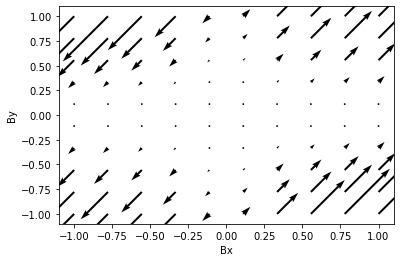

Bounds are YZ moving in X
Bounds are[-0.5, 0.5][-0.5, 0.5]
Integrand is sin(x)*y**2
Position: 
x = 0 + 10.0t + 0.0t**2


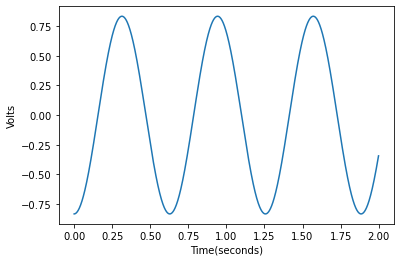

In [ ]:
import numpy as np
from numpy import meshgrid
from numpy import linspace
from numpy import *
import matplotlib.pyplot as plt
import matplotlib
import timeit


from scipy import integrate
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import dblquad
import numpy as np

from math import atan2
import copy
import os
# --------------
# Imports
# --------------
import tkinter as tk

%matplotlib inline 
# --------------
# Main Window
# --------------
MAXMAGVAL = 127
BUFFERSIZE = 1000
NUMTRANSACTIONS = 20

class GUI():
    def __init__(self):
        print("Welcome to RIMS F-LOOPS use functions of only xy for special graphing")
        self.integrand = 0
        self.direction = 'x'
        self.planepos = 0
        self.centerw = 0
        self.centerl = 0
        self.widthchar = '0'
        self.lengthchar = '0'
        self.width = 2
        self.length = 2
        self.integrandsubbed = 0
        self.Ex = 0
        self.Ey = 0
        self.Ez = 0
        self.LENGTH = 100
        self.centerX = 0
        self.centerY = 0
        self.centerZ = 0
        self.first = tk.Tk()
        self.Label = tk.Label(self.first, text="Status:")
        self.Label.grid(row=0, column=0)
        self.Statustext = tk.Label(self.first, text="Waiting to Submit")
        self.Statustext.grid(row=0, column=1)
        tk.Label(self.first, text="Bx(Wb/m**2)").grid(row=1)
        tk.Label(self.first, text="By(Wb/m**2)").grid(row=2)
        tk.Label(self.first, text="Bz(Wb/m**2)").grid(row=3)

        self.Extext = tk.Entry(self.first)
        self.Extext.grid(row=1, column=1)
        self.Eytext = tk.Entry(self.first)
        self.Eytext.grid(row=2, column=1)
        self.Eztext = tk.Entry(self.first)
        self.Eztext.grid(row=3, column=1)
        self.submitButton = tk.Button(self.first,text="submit", command=self.generateData)
        self.submitButton.grid(row=0, column=2)

        tk.Label(self.first, text="Graph Info").grid(row=4, column=1)

        tk.Label(self.first, text="Origin X(m):").grid(row=5, column=0)
        tk.Label(self.first, text="Origin Y(m):").grid(row=6, column=0)
        tk.Label(self.first, text="Origin Z(m):").grid(row=7, column=0)
        tk.Label(self.first, text="Spacing:").grid(row=8, column=0)
        
        
        
        self.OriginXtext = tk.Entry(self.first)
        self.OriginXtext.insert(tk.END, "0")
        self.OriginXtext.grid(row=5, column=1)
        
        self.OriginYtext = tk.Entry(self.first)
        self.OriginYtext.insert(tk.END, "0")
        self.OriginYtext.grid(row=6, column=1)
        
        self.OriginZtext = tk.Entry(self.first)
        self.OriginZtext.insert(tk.END, "0")
        self.OriginZtext.grid(row=7, column=1)
        
        self.Spacingtext = tk.Entry(self.first)
        self.Spacingtext.insert(tk.END, "1")
        self.Spacingtext.grid(row=8, column=1)
        self.first.mainloop()
        
        
        
        self.second = tk.Tk()
        self.Label = tk.Label(self.second, text="Status:")
        self.Label.grid(row=0, column=0)
        self.Statustext2 = tk.Label(self.second, text="Waiting to Submit")
        self.Statustext2.grid(row=0, column=1)
        self.LoopLengthtext = tk.Label(self.second, text="Loop length(m): ").grid(row=1)
        self.LoopWidthtext = tk.Label(self.second, text="Loop width(m):").grid(row=2)
        self.LoopDirectiontext = tk.Label(self.second, text="Direction Loop(x,y,z)").grid(row=3)
        self.LoopInitialVelocitytext = tk.Label(self.second, text="Initial Velocity(m/s)").grid(row=4)
        self.LoopInitialPositiontext = tk.Label(self.second, text="Inital  Position(m)").grid(row=5)
        self.LoopAccelerationtext = tk.Label(self.second, text="Acceleration(m/s**2)").grid(row=6)
        self.LoopWidthtext = tk.Label(self.second, text="Width Center(m)").grid(row=7)
        self.LoopLengthtext = tk.Label(self.second, text="Length Center(m)").grid(row=8)
        
        
        self.LoopLengthinput = tk.Entry(self.second)
        self.LoopLengthinput.insert(tk.END, "1")
        self.LoopLengthinput.grid(row=1, column=1)
        
        
        self.LoopWidthinput = tk.Entry(self.second)
        self.LoopWidthinput.insert(tk.END, "1")
        self.LoopWidthinput.grid(row=2, column=1)
        
       
        self.LoopDirectioninput = tk.Entry(self.second)
        self.LoopDirectioninput.insert(tk.END, "x")
        self.LoopDirectioninput.grid(row=3, column=1)
        
        self.LoopInitialVelocityinput = tk.Entry(self.second)
        self.LoopInitialVelocityinput.insert(tk.END, "10")
        self.LoopInitialVelocityinput.grid(row=4, column=1)
        
        self.LoopInitialPositioninput = tk.Entry(self.second)
        self.LoopInitialPositioninput.insert(tk.END, "0")
        self.LoopInitialPositioninput.grid(row=5, column=1)
        
        self.LoopAccelerationinput = tk.Entry(self.second)
        self.LoopAccelerationinput.insert(tk.END, "0")
        self.LoopAccelerationinput.grid(row=6, column=1)
        
        self.LoopCenterWidthinput = tk.Entry(self.second)
        self.LoopCenterWidthinput.insert(tk.END, "0")
        self.LoopCenterWidthinput.grid(row=7, column=1)
        
        self.LoopCenterLengthinput = tk.Entry(self.second)
        self.LoopCenterLengthinput.insert(tk.END, "0")
        self.LoopCenterLengthinput.grid(row=8, column=1)
        
        
        self.d = tk.Button(self.second,text="submit", command=self.setupLoopData)
        self.d.grid(row=0, column=2)
        
      
    
        self.direction = 'w'
        self.planepos = 0
        self.centerw = 0
        self.centerl = 0
        self.width = 2
        self.length = 2
        
        
    def setupLoopData(self):
        #print("generating DATA")
        
        temp = self.LoopDirectioninput.get()
        if(temp == "x" or temp== "y" or temp == "z"):
            self.direction  = temp
        else:
            self.Statustext2['text'] = 'Loop Direction not readable'
            return
                
        try:
            temp =  self.LoopWidthinput.get()
            self.width = float(temp)
        except:
            self.Statustext2['text'] = 'Width  not readable'
            return
        try:
            temp =  self.LoopLengthinput.get()
            self.length = float(temp)
        except:
            self.Statustext2['text'] = 'Length  not readable'
            return
        
        try:
            temp =  self.LoopCenterLengthinput.get()
            self.centerl = float(temp)
        except:
            self.Statustext2['text'] = 'Length Center  not readable'
            return
        
        try:
            temp =  self.LoopCenterWidthinput.get()
            self.centerw = float(temp)
        except:
            self.Statustext2['text'] = 'Width Center not readable'
            return
        ################################################
        try:
            temp =  self.LoopAccelerationinput.get()
            self.Acceleration = float(temp)
        except:
            self.Statustext2['text'] = 'Acceleration not readable'
            return
         
        try:
            temp =  self.LoopInitialPositioninput.get()
            self.InitialPosition = float(temp)
        except:
            self.Statustext2['text'] = 'Initial position not readable'
            return
        
        
        try:
            temp =  self.LoopInitialVelocityinput.get()
            self.InitialVelocity = float(temp)
        except:
            self.Statustext2['text'] = 'Initial velocity not readable'
            return
        
        self.Statustext2['text'] = "Sucess"
        
        self.getGraphs()
        
        

    def evalX(self, x, y, z):
        return eval(self.Ex)

    def evalY(self, x, y, z):
        return eval(self.Ey)
    
    def evalZ(self, x, y, z):
        return eval(self.Ez)
    
    
    def fx(self,y,z):
        x = self.planepos
        return eval(self.integrand)
    def fy(self,x,z):
        y = self.planepos
        return eval(self.integrand)
    def fz(self,x,y):
        z = self.planepos
        return eval(self.integrand)
    
    

    def setupDot(self):
        
        if(self.direction ==  'x'):
            self.integrand = self.Ex
            self.startpos = self.centerX
            self.lengthchar = 'y'
            self.widthchar = 'z'
            print("Bounds are YZ moving in X")
        
        if(self.direction == 'y'):
            self.integrand =self.Ey
            self.startpos = self.centerY
            self.lengthchar = 'x'
            self.widthchar = 'z'
            print("Bounds are XZ moving in Y")
        
        if(self.direction == 'z'):
            self.integrand = self.Ez
            self.startpos = self.centerZ
            self.lengthchar = 'x'
            self.widthchar = 'y'
            print("Bounds are XY moving in Z")     
        self.bounds0 = [self.centerw-(0.5*self.width), self.centerw+(0.5*self.width) ]
        self.bounds1 = [self.centerl-(0.5*self.length), self.centerl+(0.5*self.length) ]
        print("Bounds are" + str(self.bounds0) + str(self.bounds1))    
        print( "Integrand is " + str(self.integrand))
    
        
    def solveIntegralX(self, planep):
        #print("Solve Integral X")
        self.planepos = planep
        result = (integrate.nquad(self.fx, [self.bounds0, self.bounds1]))
        #print (result[0])
        return result[0]
    
   
    def solveIntegralY(self, planep):
        self.planepos = planep
        result = (integrate.nquad(self.fy, [self.bounds0, self.bounds1]))
        #print (result[0])
        return result[0]
    
    
    def solveIntegralZ(self, planep):
        self.planepos = planep
        result = (integrate.nquad(self.fz, [self.bounds0, self.bounds1]))
        #print (result[0])
        return result[0]
    
    def generateData(self):
        add = 0
        #print("generating DATA")
        try:
            #print("Enter in Ex equation")
            self.Ex = self.Extext.get()
            #print(self.Ex)
            int(self.evalX(1, 1, 1))
        except:
            self.Statustext['text'] = 'Bx not readable'
            return

        try:
            #print("Enter in Ey equation")
            self.Ey = self.Eytext.get()
            int(self.evalY(1, 1, 1))
        except:
            self.Statustext['text'] = 'By not readable'
            return
        try:
            #print("Enter in Ez equation")
            self.Ez = self.Eztext.get()
            int(self.evalZ(1, 1, 1))
        except:
            self.Statustext['text'] = 'Bz not readable'
            return

        # Add the try catches for other input here
        try:
            self.gridSpacing = float(self.Spacingtext.get())
        except:
            self.Statustext['text'] = "Spacing unreadable"
            return
        try:
            self.centerX = float(self.OriginXtext.get())
        except:
            self.Statustext['text'] = "centerX unreadable"
            return
        try:
            self.centerY = float(self.OriginYtext.get())
        except:
            self.Statustext['text'] = "centerY unreadable"
            return
        try:
            self.centerZ = float(self.OriginYtext.get())
        except:
            self.Statustext['text'] = "centerZ unreadable"
            return

        self.Statustext['text'] = "Success!"
 
        print ( "Bx " + self.Ex)
        print ( "By " + self.Ey)
        print ( "Bz " + self.Ez)
        
        x, y = meshgrid(linspace(-1 * self.gridSpacing + self.centerX, 1 * self.gridSpacing + self.centerY, 10),
                        linspace(-1 * self.gridSpacing + self.centerX, 1 * self.gridSpacing + self.centerY, 10))
        plt.clf()
        try:
            plt.quiver(x, y, eval(self.Ex), eval(self.Ey))
            plt.xlabel("Bx")
            plt.ylabel("By")
            plt.show()
        except:
            add+=1#do nothing
            
            
        return
    
    def getGraphs(self):
        self.planepos = self.InitialPosition
        self.setupDot()
        startpos = int(self.planepos)
        startvelocity = self.InitialVelocity
        time = 0
        curpos = startpos
        acceleration = self.Acceleration
        deltime = 0.001
        numpoints = 2000

        emf = np.zeros(numpoints)
        
        print("Position: ")
        print(self.direction + " = " + str(startpos) + " + " + str(startvelocity) + "t + "  +  str(acceleration/2) + "t**2")
              
        #take 10 thousand time steps
        if(self.direction == 'x'):
            prevflux = self.solveIntegralX(curpos) 
            for i in range(numpoints):
                time += deltime
                velocity = startvelocity + acceleration * time
                curpos =  startpos + velocity*time
                #print("cur pos is" + str(curpos))
                curflux = self.solveIntegralX(curpos)   
                emf[i] = -1*(curflux-prevflux)/deltime
                prevflux = curflux 
        elif(self.direction == 'y'):
            prevflux = self.solveIntegralY(curpos)
            for i in range(numpoints):
                time += deltime
                velocity = startvelocity + acceleration * time
                curpos =  startpos + velocity*time
                #print("cur pos is" + str(curpos))
                curflux = self.solveIntegralY(curpos)   
                emf[i] = -1*(curflux-prevflux)/deltime
                prevflux = curflux
        elif(self.direction == 'z'):
            prevflux = self.solveIntegralZ(curpos)
            for i in range(numpoints):
                time += deltime
                velocity = startvelocity + acceleration * time
                curpos =  startpos + velocity*time
                #print("cur pos is" + str(curpos))
                curflux = self.solveIntegralZ(curpos)   
                emf[i] = -1*(curflux-prevflux)/deltime
                prevflux = curflux 
            
        times = np.linspace(0,  numpoints*deltime,  numpoints, endpoint=False)
        plt.plot(times,emf)
        plt.xlabel("Time(seconds)")
        plt.ylabel("Volts")
        plt.show()

        
app = GUI()    
app.second.mainloop()





In [28]:
#sin(x)*y**2

Rotating Loop Below!

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
import array
B0x = float(input("Enter x component (Wb/m**2)"))
B0y = float(input("Enter y component (Wb/m**2)"))
B0z = float(input("Enter z component (Wb/m**2)"))
B = [B0x, B0y, B0z]
orientation = input("Enter oriented axis of surface vector(x,y,z)")
omega = float (input("Enter frequency of rotation(rad/s)"))
length = float (input("Enter length of side of square loop(m)"))
dataperperiod = 100
numperiods = 2
totaldatapoints = numperiods * dataperperiod
emf_values = np.zeros(totaldatapoints)


times = np.linspace(0 ,2*np.pi/omega * numperiods, totaldatapoints, endpoint = False)

#t = (math.pi) / 2
#t = np.arange(0, 2*math.pi, (math.pi)/4)
if orientation == 'x':
    for i in range (0, totaldatapoints):
        t = (2*math.pi)/omega * (i/dataperperiod)
        emf_values[i] =  omega*B0z*length**2*math.sin(omega*t) - omega*B0y*length**2*math.cos(omega*t)
        dS = [0, length**2*math.cos(omega*t), length ** 2 * math.sin(omega*t)]
        
elif orientation == 'y':
    for i in range (0, totaldatapoints):
        t = (2*math.pi)/omega * (i/dataperperiod)
        emf_values[i] =  omega*B0z*length**2*math.sin(omega*t) - omega*B0x*length**2*math.cos(omega*t)
        dS = [(length**2) *math.cos(omega*t),0, (length**2) * math.sin(omega*t)]
        
elif orientation == 'z':
    for i in range (0, totaldatapoints):
        t = (2*math.pi)/omega * (i/dataperperiod)
        emf_values[i] =  omega*B0y*length**2*math.sin(omega*t) - omega*B0x*length**2*math.cos(omega*t)
        dS = [(length**2)*math.cos(omega*t), (length**2)*math.sin(omega*t), 0]
print("Max Voltage:")
print(emf_values.max())
plt.plot(times, emf_values)
plt.xlabel("Time(seconds)")
plt.ylabel("EMF(Volts)")
plt.show()

Enter x component100
Enter y component100
Enter z component100
Enter oriented axis of surface vectorx
Enter frequency of rotationw


ValueError: could not convert string to float: 'w'